In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import urllib.request
import zipfile

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"

# Download pre-trained weights
urllib.request.urlretrieve(weights_url, weights_file)

# Build the Inception V3 Architecture
pretrained_model = InceptionV3(input_shape=(300,300,3),
                               include_top = False,
                               weights = None
                              )

In [2]:
# Load pre-trained weights into inception v3 architecture
pretrained_model.load_weights(weights_file)

In [3]:
pretrained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [4]:
# Freeze the pre-trained layers in place, ie, make them not trainable
for layer in pretrained_model.layers:
    layer.trainable = False

In [5]:
last_layer = pretrained_model.get_layer("mixed8")
print("Output shape:", last_layer.output.shape)
last_output = last_layer.output

Output shape: (None, 8, 8, 1280)


In [6]:
# Adding Dense Layer below pre-trained convultions
from tensorflow.keras.layers import Flatten, Dense
x = Flatten()(last_output)
x = Dense(1024, activation = "relu")(x)
x = Dense(1, activation = "sigmoid")(x)

In [7]:
# Building a model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model
model = Model(pretrained_model.input, x)

model.compile(
    optimizer = RMSprop(learning_rate = 0.001),
    loss="binary_crossentropy",
    metrics = ["accuracy"]
)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "horse-or-human/training"

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.


In [9]:
validation_dir = "horse-or-human/validation"

validation_datagen = ImageDataGenerator(rescale = 1/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (300, 300),
    class_mode = "binary"
)

Found 256 images belonging to 2 classes.


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 10,
    restore_best_weights = True
)

In [11]:
history = model.fit(
    train_gen,
    epochs = 40,
    validation_data=validation_generator,
    callbacks=[early_stopping],
)

Epoch 1/40


/Users/avitirto/anaconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.7797 - loss: 16.4976 - val_accuracy: 0.9805 - val_loss: 0.4625
Epoch 2/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9560 - loss: 2.0792 - val_accuracy: 0.9805 - val_loss: 0.2958
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.9706 - loss: 0.9719 - val_accuracy: 1.0000 - val_loss: 5.9980e-10
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.9770 - loss: 0.2203 - val_accuracy: 0.9805 - val_loss: 0.4870
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.9661 - loss: 0.5913 - val_accuracy: 0.9922 - val_loss: 0.1303
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.9987 - loss: 0.0400 - val_accuracy: 0.9922 - val_loss: 0.1559
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.9988 - loss: 0.0134 - val_accuracy: 0.9102 - val_loss: 3.2265
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step - accuracy: 0.9923 - loss: 0.0876 - val_accuracy: 0.9844 - val_los

Minimum validation loss: 5.998014307451172e-10


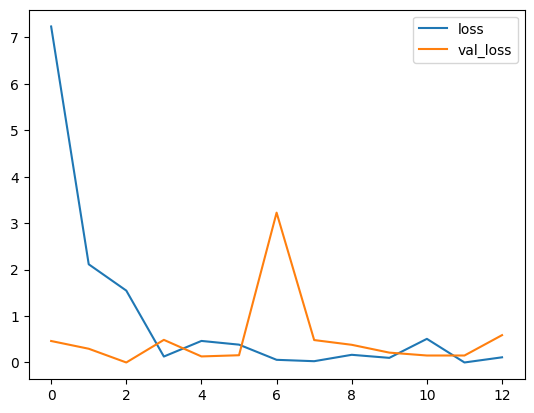

In [12]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))